In [ ]:
!wget !wget https://github.com/HuynhBaThuan/DATN/raw/main/AI/src/data/FER.zip -O data.zip
!unzip data.zip -d data

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: data/train/sad/Training_65242339.jpg  
  inflating: data/train/sad/Training_65267116.jpg  
  inflating: data/train/sad/Training_65275626.jpg  
  inflating: data/train/sad/Training_6529266.jpg  
  inflating: data/train/sad/Training_65329617.jpg  
  inflating: data/train/sad/Training_65338712.jpg  
  inflating: data/train/sad/Training_65338797.jpg  
  inflating: data/train/sad/Training_65387162.jpg  
  inflating: data/train/sad/Training_65404494.jpg  
  inflating: data/train/sad/Training_65426218.jpg  
  inflating: data/train/sad/Training_65430136.jpg  
  inflating: data/train/sad/Training_65437377.jpg  
  inflating: data/train/sad/Training_6545735.jpg  
  inflating: data/train/sad/Training_65463385.jpg  
  inflating: data/train/sad/Training_65473985.jpg  
  inflating: data/train/sad/Training_65502829.jpg  
  inflating: data/train/sad/Training_65505359.jpg  
  inflating: data/train/sad/Training_65508578.jpg  
  inflati

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import random
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
from keras.utils import plot_model

In [ ]:
from IPython.display import SVG, Image

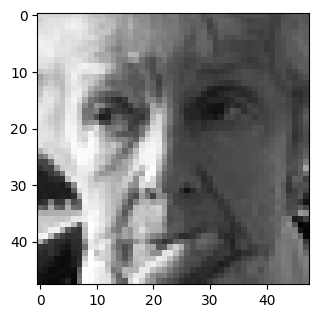

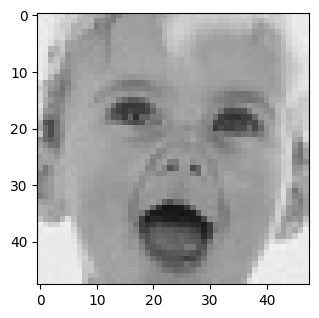

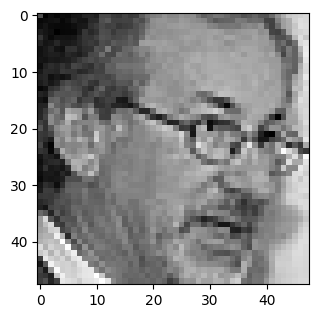

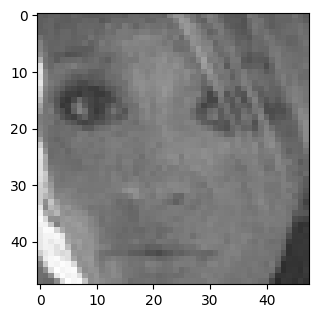

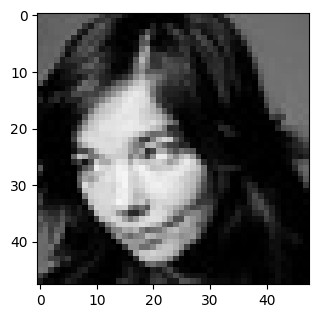

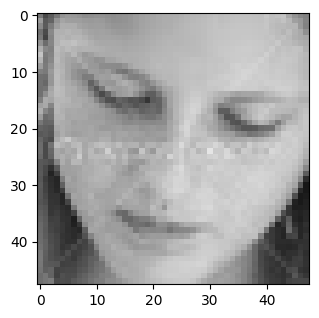

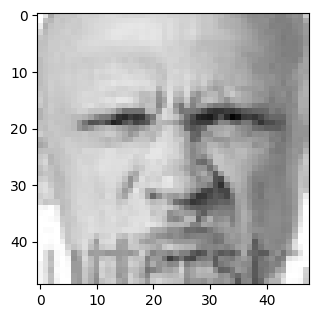

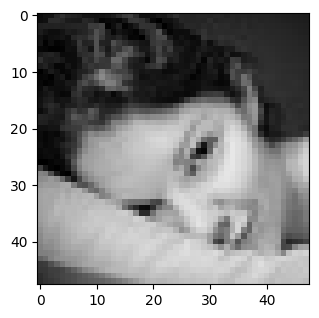

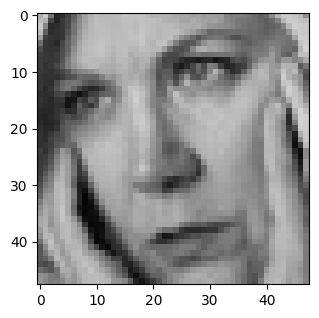

In [ ]:
train_img=("data/train/**/**")
images=glob(train_img)
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))#;plt.axis('off')

In [ ]:
train_dir = 'data/train'
test_dir = "data/test"

row = 48
col = 48
classes = len(os.listdir('data/train'))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   width_shift_range= 0.1,
                                   height_shift_range= 0.1,
                                   shear_range= 0.2 )



training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
def get_model(input_size, classes=7):
     #Initialising the CNN
     model = tf.keras.models.Sequential()

     model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(2, 2))
     model.add(Dropout(0.25))

     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
     model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2, 2)))
     model.add(Dropout(0.25))

     model.add(Flatten())
     model.add(Dense(1024, activation='relu'))
     model.add(Dropout(0.5))

     model.add(Dense(classes, activation='softmax'))

     #Compliling the model
     model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
     # model = tf.keras.models.Sequential()

     # # Layer Convolutional đầu tiên với activation relu
     # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_size))
     # # Layer MaxPooling để giảm kích thước của feature map
     # model.add(MaxPooling2D((2, 2)))

     # # Thêm một convolutional layer với số filter lớn hơn và kích thước kernel khác
     # model.add(Conv2D(64, (3, 3), activation='relu'))
     # model.add(MaxPooling2D((2, 2)))

     # # Tiếp tục thêm các convolutional layer và max pooling layer
     # model.add(Conv2D(128, (3, 3), activation='relu'))
     # model.add(MaxPooling2D((2, 2)))

     # # Đưa feature map từ tensor sang vector bằng Flatten layer
     # model.add(Flatten())

     # # Thêm một fully connected layer với 256 units và activation relu
     # model.add(Dense(256, activation='relu'))

     # # Sử dụng Dropout để giảm overfitting
     # model.add(Dropout(0.5))

     # # Output layer với số units tương ứng với số lượng classes và activation softmax
     # model.add(Dense(classes, activation='softmax'))

     # # Compile model với optimizer, loss function và metrics
     # # model.compile(optimizer='adam',
     # #           loss='categorical_crossentropy',
     # #           metrics=['accuracy'])
     # model.compile(optimizer=Adam(learning_rate=0.0001),
     #              loss='categorical_crossentropy',
     #              metrics=['accuracy'])
     return model

In [16]:
fernet = get_model((48,48,1))
fernet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │    31,720,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,116,743 (122.52 MB)

 Trainable params: 32,116,103 (122.51 MB)

 Non-trainable params: 640 (2.50 KB)

In [18]:
plot_model(fernet, to_file='fernet.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
chk_path = 'ferNet.keras'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                  validation_data=test_set,
                  epochs=150,
                  callbacks=callbacks,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_steps)

Epoch 1/150
448/448 [==============================] - ETA: 0s - loss: 4.3699 - accuracy: 0.2518
Epoch 1: val_accuracy improved from inf to 0.22168, saving model to ferNet.keras
448/448 [==============================] - 61s 116ms/step - loss: 4.3699 - accuracy: 0.2518 - val_loss: 5.4121 - val_accuracy: 0.2217 - lr: 1.0000e-04
Epoch 2/150
448/448 [==============================] - ETA: 0s - loss: 3.6291 - accuracy: 0.2969
Epoch 2: val_accuracy did not improve from 0.22168
448/448 [==============================] - 30s 68ms/step - loss: 3.6291 - accuracy: 0.2969 - val_loss: 3.2093 - val_accuracy: 0.3816 - lr: 1.0000e-04
Epoch 3/150
448/448 [==============================] - ETA: 0s - loss: 3.0855 - accuracy: 0.3301
Epoch 3: val_accuracy did not improve from 0.22168
448/448 [==============================] - 30s 67ms/step - loss: 3.0855 - accuracy: 0.3301 - val_loss: 2.7333 - val_accuracy: 0.3941 - lr: 1.0000e-04
Epoch 4/150
448/448 [==============================] - ETA: 0s - loss: 2.65

In [ ]:
total_accuracy = 0
num_iterations = 5

for _ in range(num_iterations):
    accuracy = fernet.evaluate(test_set)
    total_accuracy += accuracy

average_accuracy = total_accuracy / num_iterations
print("Average Accuracy:", average_accuracy)

In [ ]:
fernet.evaluate(test_set)

113/113 [==============================] - 3s 27ms/step - loss: 0.9821 - accuracy: 0.6838


[0.9820840358734131, 0.6837559342384338]

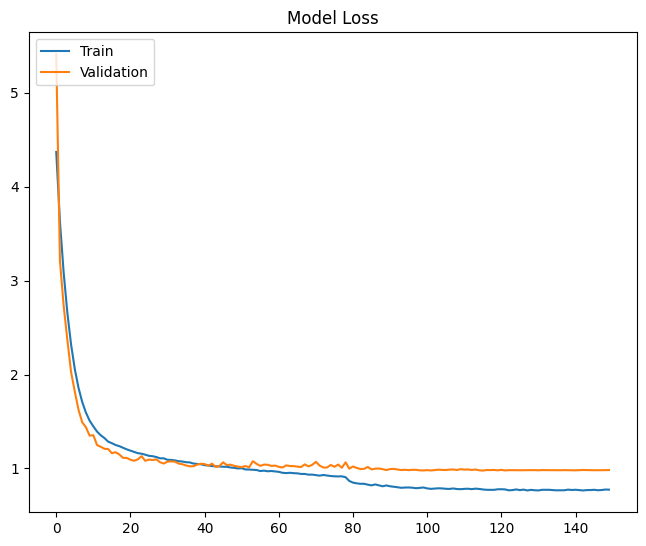

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

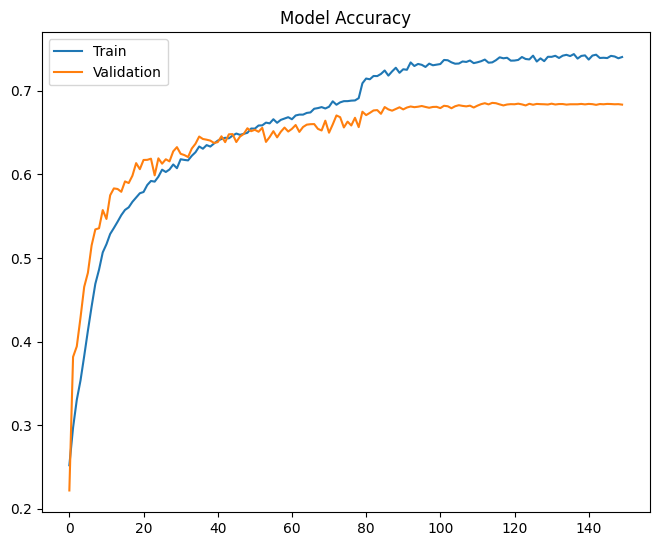

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
print("Training Loss:", hist.history['loss'])
print("Validation Loss:", hist.history['val_loss'])

Training Loss: [4.36991548538208, 3.629145383834839, 3.0854644775390625, 2.65743088722229, 2.3198859691619873, 2.0591626167297363, 1.8592473268508911, 1.7081239223480225, 1.5952006578445435, 1.5088918209075928, 1.448006272315979, 1.3924486637115479, 1.3527952432632446, 1.3235751390457153, 1.285253643989563, 1.2688976526260376, 1.24973464012146, 1.2373936176300049, 1.2199465036392212, 1.2033002376556396, 1.189658284187317, 1.1758406162261963, 1.1626615524291992, 1.15688157081604, 1.1462668180465698, 1.1343419551849365, 1.1304470300674438, 1.121113896369934, 1.107711911201477, 1.1076956987380981, 1.0916460752487183, 1.0908077955245972, 1.085721731185913, 1.077134132385254, 1.0735362768173218, 1.0662624835968018, 1.0642004013061523, 1.0517791509628296, 1.0485414266586304, 1.0447524785995483, 1.0346165895462036, 1.0316646099090576, 1.025354027748108, 1.0224133729934692, 1.0210785865783691, 1.017978310585022, 1.0171637535095215, 1.0100454092025757, 1.0059553384780884, 0.9997876882553101, 1.

In [ ]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 2s 21ms/step - loss: 0.9821 - accuracy: 0.6838
final train accuracy = 79.59 , validation accuracy = 68.38


In [ ]:
model_json=fernet.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)

In [ ]:
from google.colab import files

In [ ]:
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('ferNet.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('training.log')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('fernet.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fernet.save('model_17_5_file.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('model_17_5_file.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Lưu lịch sử huấn luyện vào một tệp
with open('training_history_17_5.pkl', 'wb') as file:
    pickle.dump(hist.history, file)

In [ ]:
files.download('training_history_17_5.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('training_history_17_5.pkl')